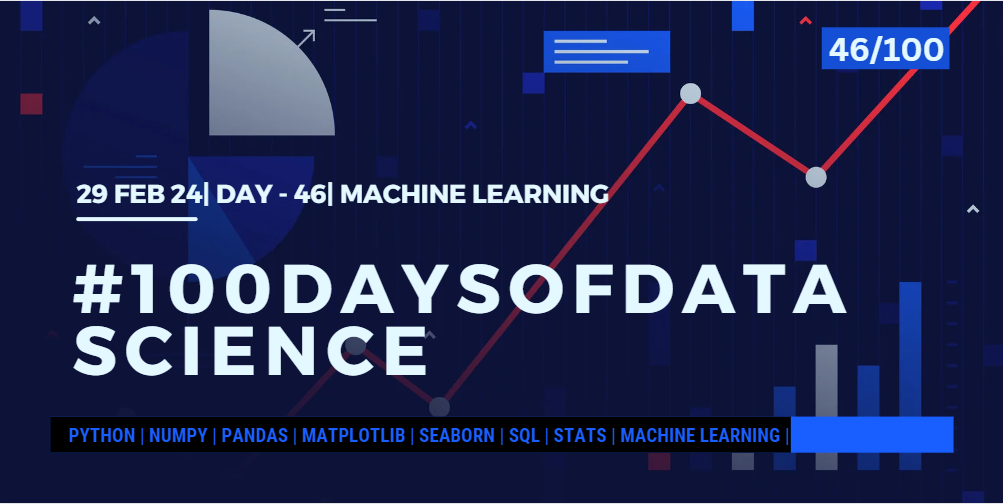

# <center>Poisson Regression<center><hr style="border:4.5px solid #108999"> </hr>
 
    

* In statistics, Poisson regression is a generalized linear model form of regression analysis used to model count data and contingency tables.
* Poisson regression assumes the response variable Y has a Poisson distribution, and assumes the logarithm of its expected value can be modeled by a linear combination of unknown parameters.
* A Poisson regression model is sometimes known as a log-linear model, especially when used to model contingency tables.
* Negative binomial regression is a popular generalization of Poisson regression because it loosens the highly restrictive assumption that the variance is equal to the mean made by the Poisson model. 
* The traditional negative binomial regression model is based on the Poisson-gamma mixture distribution. This model is popular because it models the Poisson heterogeneity with a gamma distribution.
* Poisson regression models are generalized linear models with the logarithm as the (canonical) link function, and the Poisson distribution function as the assumed probability distribution of the response. 

In [2]:
### Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import PoissonRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

In [3]:
### Import the Dataset
df = pd.read_csv(r'C:\Users\hp\Desktop\100DaysOfDataScience\Day 46\competition_awards_data.csv')
df.head()

,Awards,Math Score
0,0,43
1,0,38
2,0,41
3,0,33
4,0,39


In [4]:
df.shape ### Checking Shape

(200, 2)

In [5]:
df.describe() ### Get information of the Dataset

,Awards,Math Score
count,200.000000,200.000000
mean,0.630000,50.715000
std,1.052921,19.148029
min,0.000000,30.000000
25%,0.000000,35.000000
50%,0.000000,42.000000
75%,1.000000,66.000000
max,6.000000,91.000000


In [6]:
df.columns ### Checking Columns

Index(['Awards', 'Math Score'], dtype='object')

In [7]:
df.info() ### Checking Information About a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Awards      200 non-null    int64
 1   Math Score  200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


In [8]:
df.isnull().sum() ### Checking Null Values in the Data

Awards        0
Math Score    0
dtype: int64

In [9]:
df1 = pd.DataFrame.copy(df)
df1.shape

(200, 2)

In [10]:
for i in df1.columns:
    print({i:df1[i].unique()}) ### Checking Unique values in each columns

{'Awards': array([0, 1, 3, 2, 5, 4, 6], dtype=int64)}
{'Math Score': array([43, 38, 41, 33, 39, 35, 36, 60, 30, 32, 37, 44, 45, 34, 40, 42, 64,
       62, 50, 65, 68, 31, 47, 89, 70, 66, 61, 83, 59, 48, 69, 63, 86, 72,
       67, 88, 71, 80, 82, 90, 87, 46, 81, 91, 85], dtype=int64)}


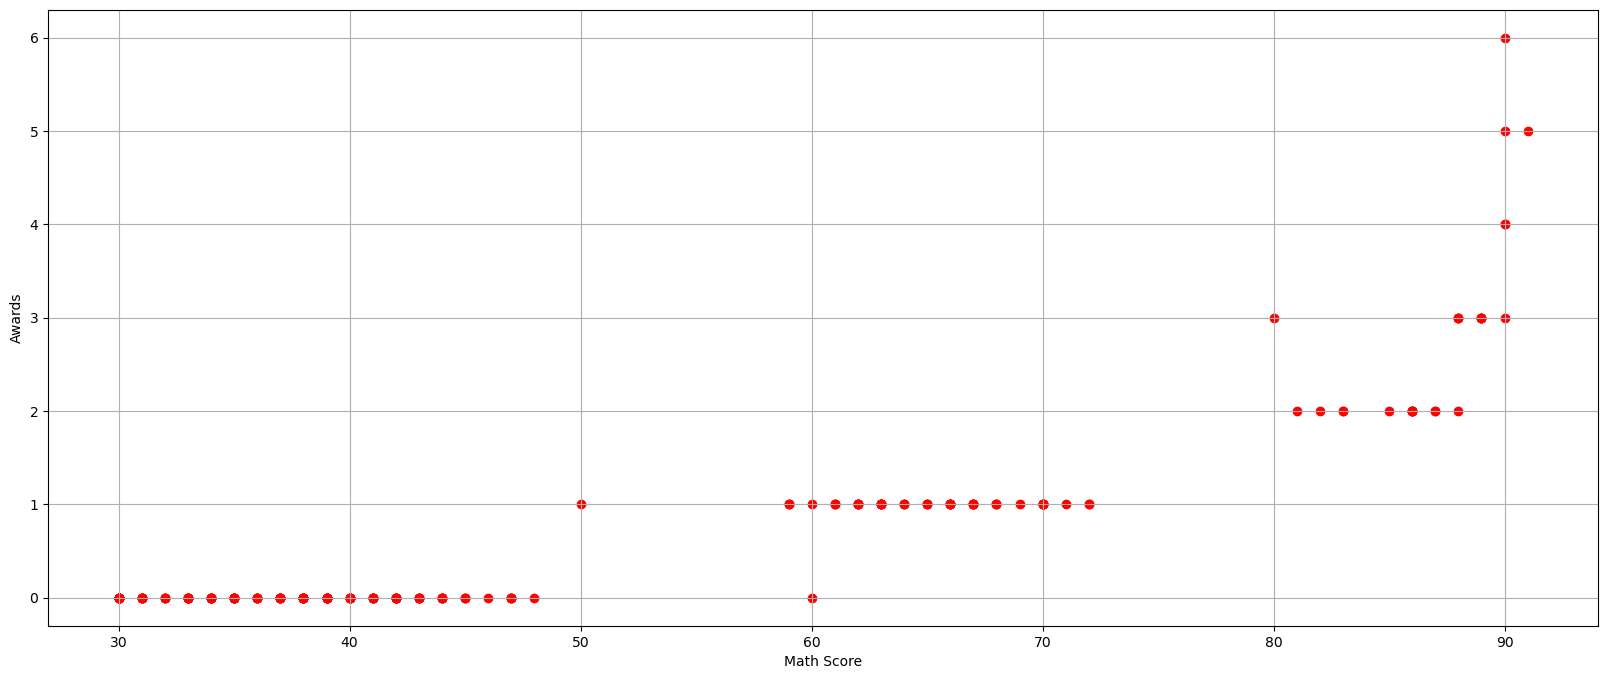

In [15]:
fig, ax = plt.subplots(figsize=(20,8))
plt.grid()
ax.set_ylabel("Awards")                                
ax.set_xlabel("Math Score")
ax.scatter( df1['Math Score'],df1.Awards,color='red')
plt.show()

In [27]:
### Spliting Data into X and y
X = df1['Math Score'].values.reshape(-1, 1)
y = df1.Awards
print('X:',X.shape)
print('*' * 10)
print('y:',y.shape)

X: (200, 1)
**********
y: (200,)


In [28]:
y = y.astype(int) #convert y in to integer always perform this operation

In [33]:
### Spliting into Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (160, 1)
X_test:  (40, 1)
y_train:  (160,)
y_test:  (40,)


In [34]:
#create a model object
pipeline = Pipeline([('model', PoissonRegressor())])
#train the model object
pipeline.fit(X_train, y_train)
#predict using the model
y_pred = pipeline.predict(X_test)
print(y_pred)

[0.07497373 0.04367845 0.60249917 0.05505896 3.29156503 0.09450829
 0.09450829 0.08098962 0.4779645  4.14918936 3.84098829 0.06940469
 0.04043402 0.04367845 0.51631639 0.1501729  0.51631639 0.75948163
 3.84098829 0.11913263 0.05505896 0.12869184 0.10209164 0.08748823
 0.06940469 3.29156503 0.06424932 0.08098962 4.48212049 0.40959542
 0.08098962 0.0594769  0.8862532  3.55568035 0.75948163 0.10209164
 0.04043402 0.04043402 0.04043402 3.04706815]


In [38]:
# Checking r2 score for the model
r2_test = r2_score(y_test, y_pred)
r2_test

0.8371373661390169

In [40]:
# training performance
y_pred_train = pipeline.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
r2_train

0.8586107885977591

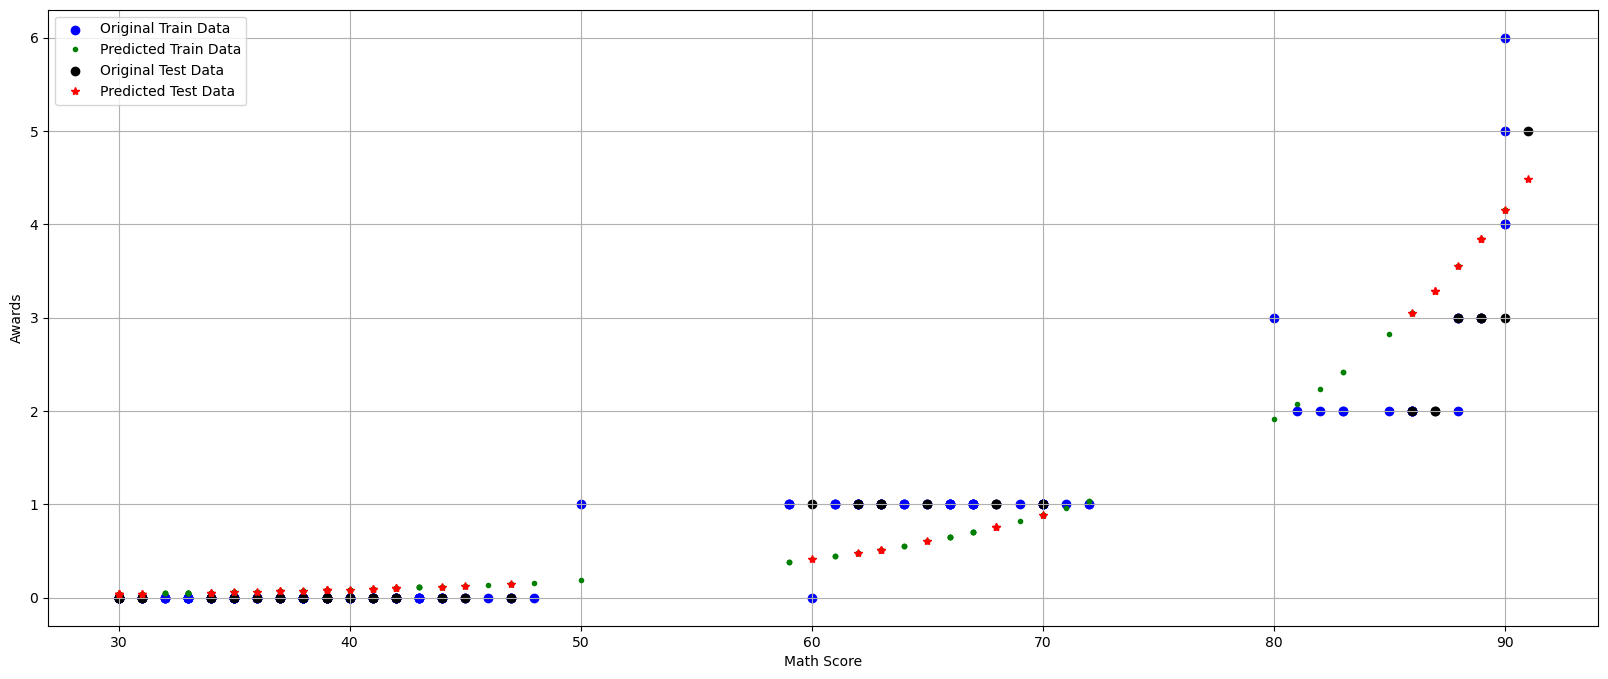

In [43]:
# plot predictions and actual values against Math score

fig, ax = plt.subplots(figsize=(20,8))
plt.grid()
ax.set_xlabel("Math Score")                                
ax.set_ylabel("Awards")
# train data in blue
ax.scatter(X_train, y_train,color='blue',label="Original Train Data")
ax.plot(X_train, y_pred_train, '.', color='green',label="Predicted Train Data")
# test data
ax.scatter(X_test, y_test,color='black',label="Original Test Data")
ax.plot(X_test, y_pred, '*', color='red',label="Predicted Test Data")
ax.legend()
plt.show()

In [44]:
eval = pd.DataFrame({'y_pred': [round(y, 0) for y in y_pred], 'y': y_test}).reset_index()
eval.head()

,index,y_pred,y
0,58,0.0,0
1,40,0.0,0
2,34,1.0,1
3,102,0.0,0
4,184,3.0,2


In [46]:
print('Frequency table')
eval.groupby(['y', 'y_pred']).agg('count').reset_index().pivot(index='y', columns='y_pred', values='index').fillna(0)

Frequency table


y_pred,0.0,1.0,3.0,4.0
y,,,,
0,24.0,0.0,0.0,0.0
1,2.0,6.0,0.0,0.0
2,0.0,0.0,3.0,0.0
3,0.0,0.0,0.0,4.0
5,0.0,0.0,0.0,1.0


##### <center> Made with ❤️ by Zahid Salim Shaikh</center>